# Supplementary Figures
## Imports

In [1]:
import pandas as pd
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
from Shared_Scripts.plotting_functions import correlation
import StudyII_All_5_note_Sets.paths as StudyII_paths
import Study_Uniform.paths as Study_uniform_paths
import Study_Likert.paths as Study_likert_paths
import seaborn as sns
import os
from scipy import stats
from Shared_Scripts.stat_funcs import cohen_d_one_sample, cohen_d_independent_t_test

Run_Stats = True

studyI_GL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename)  # Study I: Post-exclusion group-level data

studyI_TL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.processed_data_pickle_filename)  # Study I: Post-exclusion trial-level data

# Load Data
studyII_GL = pd.read_pickle(
    StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename)  # Study II: Post-exclusion group-level data

study_likert = pd.read_csv(Study_likert_paths.processed_dir + 'set_level_results.csv')  # Study II: Likert ratings

studyII_GL['EOS_std'] = studyII_GL['evenness_of_spread']**(1/2)
temp = studyII_GL['EOS_std_inv'] = 1-studyII_GL['EOS_std']

study_uniform_GL = pd.read_pickle(
    Study_uniform_paths.processed_dir + Study_uniform_paths.post_exclusion_data_pickle_filename)  # Study III: Post-exclusion group-level data

ROOT_DIR = os.path.abspath(os.getcwd())  # This is where this file is


+### Score distribution Table (in LaTeX format)

In [2]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC2','IC3','IC4','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Print Pandas as table
print(temp.style.to_latex())

\begin{tabular}{llrrrrrrrr}
 & Set & Bias towards note deviation & IC1 & IC2 & IC3 & IC4 & IC5 & IC6 & Evenness \\
7 & 0 1 2 4 8 & -0.007997 & 2.000000 & 2.000000 & 1.000000 & 3.000000 & 1.000000 & 1.000000 & 0.905719 \\
2 & 0 1 2 3 6 & 0.032666 & 3.000000 & 2.000000 & 2.000000 & 1.000000 & 1.000000 & 1.000000 & 0.873070 \\
3 & 0 1 2 3 7 & 0.055176 & 3.000000 & 2.000000 & 1.000000 & 1.000000 & 2.000000 & 1.000000 & 0.882149 \\
59 & 0 3 4 6 8 & 0.062662 & 1.000000 & 2.000000 & 2.000000 & 3.000000 & 1.000000 & 1.000000 & 0.933333 \\
65 & 0 4 5 6 7 & 0.067452 & 3.000000 & 2.000000 & 1.000000 & 1.000000 & 2.000000 & 1.000000 & 0.882149 \\
11 & 0 1 2 6 7 & 0.083613 & 3.000000 & 1.000000 & 0.000000 & 1.000000 & 3.000000 & 2.000000 & 0.915016 \\
61 & 0 3 5 6 7 & 0.083871 & 2.000000 & 2.000000 & 2.000000 & 1.000000 & 2.000000 & 1.000000 & 0.902817 \\
5 & 0 1 2 4 6 & 0.084478 & 2.000000 & 3.000000 & 1.000000 & 2.000000 & 1.000000 & 1.000000 & 0.889446 \\
52 & 0 2 5 6 8 & 0.087034 & 1.000000 & 2

### Score distribution Table (in pandas format)

In [3]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC2','IC3','IC4','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Create a doc file with the table
temp.to_csv('score_distribution_table.csv')

# Print Pandas as table
print(temp)

          Set  Bias towards note deviation  IC1  IC2  IC3  IC4  IC5  IC6  \
7   0 1 2 4 8                    -0.007997  2.0  2.0  1.0  3.0  1.0  1.0   
2   0 1 2 3 6                     0.032666  3.0  2.0  2.0  1.0  1.0  1.0   
3   0 1 2 3 7                     0.055176  3.0  2.0  1.0  1.0  2.0  1.0   
59  0 3 4 6 8                     0.062662  1.0  2.0  2.0  3.0  1.0  1.0   
65  0 4 5 6 7                     0.067452  3.0  2.0  1.0  1.0  2.0  1.0   
..        ...                          ...  ...  ...  ...  ...  ...  ...   
37  0 2 3 5 7                     0.256795  1.0  3.0  2.0  1.0  3.0  0.0   
16  0 1 3 4 8                     0.260043  2.0  1.0  2.0  3.0  2.0  0.0   
44  0 2 4 5 7                     0.287388  1.0  3.0  2.0  1.0  3.0  0.0   
19  0 1 3 5 8                     0.317994  1.0  2.0  2.0  2.0  3.0  0.0   
50  0 2 4 7 9                     0.320470  0.0  3.0  2.0  1.0  4.0  0.0   

    Evenness  
7   0.905719  
2   0.873070  
3   0.882149  
59  0.933333  
65  0.882149

### Likert Ratings
#### "Some notes felt more important than others." correlation with scores

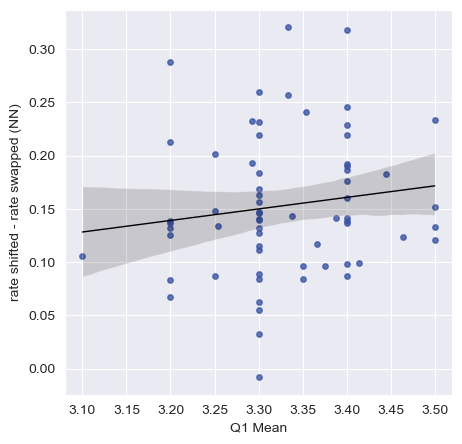

In [3]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q1 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_hierarchy.svg", line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8})

#### "The audio clip was melodic." correlation with scores

PearsonRResult(statistic=0.5438737695814766, pvalue=2.363013377350307e-06)
0.5438737695814766


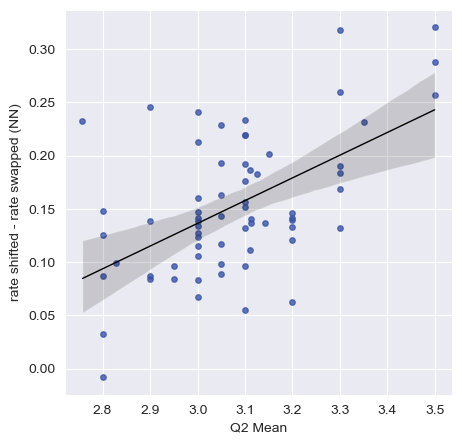

In [26]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q2 Mean', y='rate shifted - rate swapped (NN)', type='pearson',
            normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_melodic.svg",
            line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8}
            )

stat_no_perm = stats.pearsonr(likert_corr["Q2 Mean"], s2["rate shifted - rate swapped (NN)"])
print(stat_no_perm)
print(stat_no_perm[0])

#### "The melody as a whole or parts of it felt familiar." correlation with scores

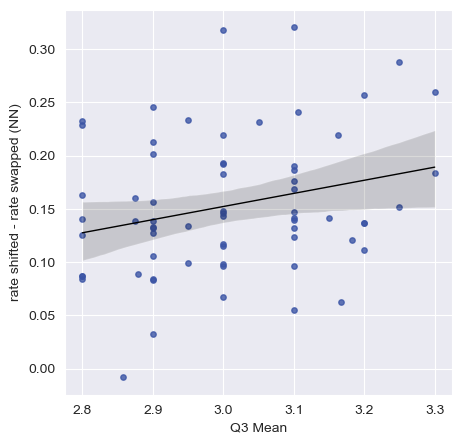

In [27]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q3 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5,save_to=ROOT_DIR + "/Plots/correlation_likert_familiarity.svg",
            line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8}
            )

### Study I results  (12-note) for musicians and non-musicians

   length  sona subject_gender
0    12.0    16         Female
1    12.0     2           Male
2    16.0    16         Female
3    16.0     2           Male


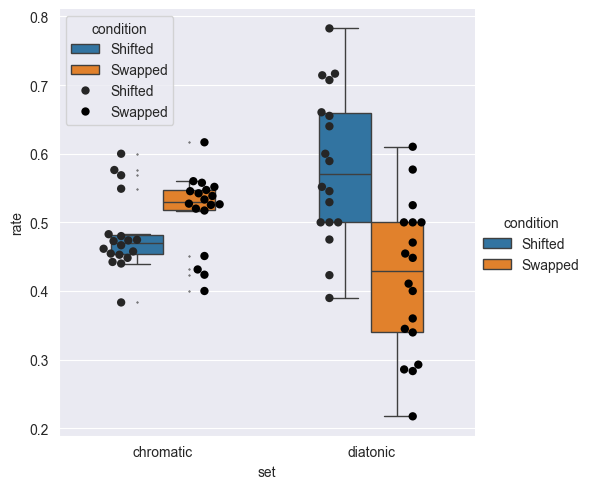

In [2]:
# Only keep rows with length 12 or 16
expt1_data_12_16_note = studyI_GL[studyI_GL['length'] >= 12]

# Only keep people who are not musicians
expt1_data_12_16_nonmusicians = expt1_data_12_16_note[expt1_data_12_16_note["How many years of formal musical training do you have?"] == "0"]
expt1_data_12_16_nonmusicians = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians["Do you play any instruments (with or without formal training)?"] == "No"]

temp2 = expt1_data_12_16_nonmusicians.groupby(['sona','length','subject']).first().reset_index()
# group total subjects by length
temp2 = expt1_data_12_16_nonmusicians.groupby(['length', 'subject_gender']).count().reset_index()

print(temp2[['length','sona','subject_gender']])

expt1_data_12_16_nonmusicians = expt1_data_12_16_nonmusicians[['rate_NN_shifted','rate_NN_swapped','set']]
expt1_data_12_16_nonmusicians = pd.melt(expt1_data_12_16_nonmusicians,id_vars=["set"],var_name="condition",value_name="rate")
expt1_data_12_16_nonmusicians['condition'] = expt1_data_12_16_nonmusicians['condition'].replace('rate_NN_shifted',"Shifted")
expt1_data_12_16_nonmusicians['condition'] = expt1_data_12_16_nonmusicians['condition'].replace('rate_NN_swapped',"Swapped")

ax = sns.catplot(x="set", y="rate", data=expt1_data_12_16_nonmusicians, kind="box", hue="condition", fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt1_data_12_16_nonmusicians, x="set", y="rate", hue="condition", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

# save figure
ax.savefig(ROOT_DIR + "/Plots/StudyI_musicianship.svg", format="svg", dpi=300)

In [3]:
# Run Stats for non-musicians (Supp. Figure 1A)
if Run_Stats:
    # grab chromatic and pentatonic sets, respectively
    note_12_16_chromatic = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians['set']=='chromatic']
    note_12_16_pentatonic = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians['set']=='diatonic']
    
    [T_Val_12_16_note_pentatonic, P_12_16_note_pentatonic] = stats.ttest_1samp(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    [T_Val_12_16_chromatic, P_12_16_note_chromatic] = stats.ttest_1samp(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    
    effect_size_nonmusicians_pentatonic = cohen_d_one_sample(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_chromatic = cohen_d_one_sample(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)

### Study II - 3 worst sets vs 3 best sets for non-musicians

/var/folders/bm/tx0fw97s0w5020l7n7hth5mc0000gn/T/ipykernel_1670/1284105570.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=expt2_top_bottom_nonmusicians, x="set_type", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)


<Axes: xlabel='set_type', ylabel='rate'>

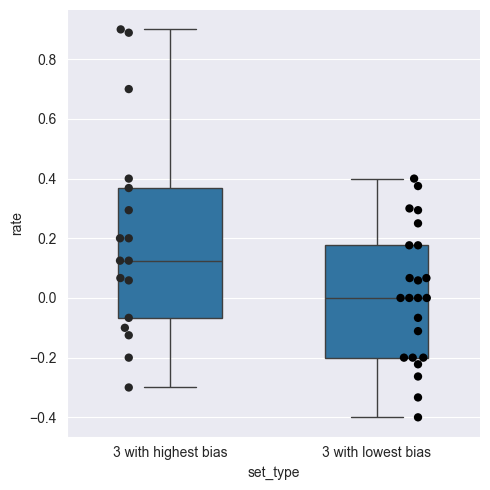

In [4]:
# 3 worst sets: 01248 01236 01237
# 3 best sets: 02479 01358 02457
expt2_top_bottom = studyII_GL[studyII_GL['set'].isin(['0 1 2 4 8','0 1 2 3 6','0 1 2 3 7','0 2 4 7 9','0 1 3 5 8','0 2 4 5 7'])]

# Remove non-musicians
expt2_top_bottom_nonmusicians = expt2_top_bottom[expt2_top_bottom['How many years of formal musical training do you have?']=='0']
expt2_top_bottom_nonmusicians = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['Do you play any instruments (with or without formal training)?']=='No']

# Add column to label the sets as "Best" and "Worst"
expt2_top_bottom_nonmusicians['set_type'] = expt2_top_bottom_nonmusicians['set'].apply(lambda x: '3 with highest bias' if x in ['0 2 4 7 9','0 1 3 5 8','0 2 4 5 7'] else '3 with lowest bias')

# rename rate shifted - rate swapped (NN) to "rate"
expt2_top_bottom_nonmusicians = expt2_top_bottom_nonmusicians.rename(columns={'rate shifted - rate swapped (NN)':'rate'})

ax = sns.catplot(x="set_type", y="rate", data=expt2_top_bottom_nonmusicians, kind="box",  fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt2_top_bottom_nonmusicians, x="set_type", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

In [5]:
# Run Stats for non-musicians (Supp. Figure 1B)
if Run_Stats:
    # get only set types
    new_df_study_2_highest_sets = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['set_type']=='3 with highest bias']
    new_df_study_2_lowest_sets = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['set_type']=='3 with lowest bias']
    
    [T_Val_lowest_highest, P_lowest_highest] = stats.ttest_ind(new_df_study_2_highest_sets["rate"], new_df_study_2_lowest_sets["rate"])
    
    effect_size_lowest_highest = cohen_d_independent_t_test(new_df_study_2_highest_sets["rate"], new_df_study_2_lowest_sets["rate"])

### Bias for uniform Sets (combined) for non-musicians

/var/folders/bm/tx0fw97s0w5020l7n7hth5mc0000gn/T/ipykernel_1670/641511171.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=expt3_data_nonmusicians, x="set", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)


<Axes: xlabel='set', ylabel='rate'>

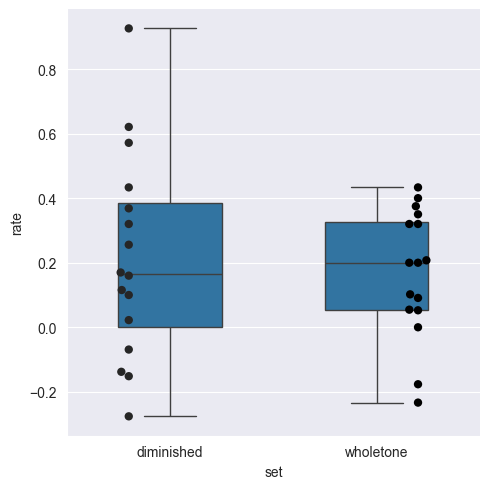

In [13]:
expt3_data = study_uniform_GL

# Remove non-musicians
expt3_data_nonmusicians = expt3_data[expt3_data['How many years of formal musical training do you have?']=='0']
expt3_data_nonmusicians = expt3_data_nonmusicians[expt3_data_nonmusicians['Do you play any instruments (with or without formal training)?']=='No']

# Rename rate shifted - rate swapped (NN) to "rate"
expt3_data_nonmusicians = expt3_data_nonmusicians.rename(columns={'rate shifted - rate swapped (NN)':'rate'})

# Rename all sets to "uniform"
#expt3_data_nonmusicians['set'] = 'uniform'

ax = sns.catplot(x="set", y="rate", data=expt3_data_nonmusicians, kind="box",  fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt3_data_nonmusicians, x="set", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

In [14]:
# Run Stats for non-musicians (Supp. Figure 1B)
if Run_Stats:
    # run stats for diminished and whole tone, individually
    expt3_data_nonmusicians_diminished = expt3_data_nonmusicians[expt3_data_nonmusicians['set'].isin(['diminished'])]
    # grab the same for whole tone
    expt3_data_nonmusicians_wholetone = expt3_data_nonmusicians[expt3_data_nonmusicians['set'].isin(['wholetone'])]
    
    [T_Val_diminished, P_diminished] = stats.ttest_1samp(expt3_data_nonmusicians_diminished['rate'], 0)
    effect_size_diminished = cohen_d_one_sample(expt3_data_nonmusicians_diminished['rate'], 0)
    
    [T_Val_wholetone, P_wholetone] = stats.ttest_1samp(expt3_data_nonmusicians_wholetone['rate'], 0)
    effect_size_wholetone  = cohen_d_one_sample(expt3_data_nonmusicians_wholetone['rate'], 0)

### Exp. 1 mean bias as a function of number of responses

<Axes: xlabel='response_count', ylabel='bias'>

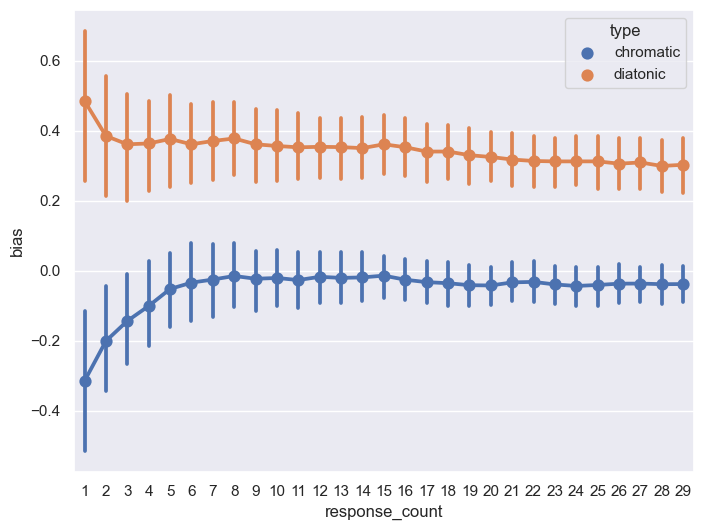

In [62]:
temp = studyI_TL

# Only keep rows with length 12 or 16
temp = temp[temp['length'] >= 12]

# Remove subjects who didn't understand the task
temp = temp[temp['understood task'] == True]

# Remove neither trials
temp = temp[temp['response'] != 'neither']

# Sort by 'subject', 'type', and 'time'
temp = temp.sort_values(by=['subject', 'type', 'time'])

temp_totals = temp

for i in range(1,30):
    # For each subject and type count how many times "chose" is equal to "shifted" in the first i rows of each group
    temp3 = temp.groupby(['subject', 'type']).apply(lambda x: (x['chose'] == 'shifted').head(i).sum()/i).reset_index(name='responses_'+str(i))
    
    # Add the new column to the temp_totals df
    temp_totals = temp_totals.merge(temp3, on=['subject', 'type'], how='left')
    
# Create new df with columns 'subject', 'type', 'response_count' (omit "responses_" from 'responses_'+str(i)), 'value'
temp_totals = pd.melt(temp_totals, id_vars=['subject', 'type'], value_vars=[col for col in temp_totals.columns if 'responses_' in col], var_name='response_count', value_name='rate_shifted')

# Remove duplicates
temp_totals = temp_totals.drop_duplicates()

temp_totals['rate_swapped'] = 1 - temp_totals['rate_shifted']

temp_totals['bias'] = temp_totals['rate_shifted'] - temp_totals['rate_swapped']

# Rename 'responses_' to ''
temp_totals['response_count'] = temp_totals['response_count'].str.replace('responses_','')
# 
# Convert 'response_count' to int
temp_totals['response_count'] = temp_totals['response_count'].astype(int)

# Make the plot very wide
sns.set(rc={'figure.figsize':(8,6)})

sns.pointplot(y="bias", x="response_count", hue='type', data=temp_totals,errorbar=('ci', 95))


## RUN STATISTICS

In [9]:
# Run Stats for non-musicians (Supp. Figure 1)
if Run_Stats:
    # 12 & 16 note sets (non-musicians)
    expt1_nonmusicians = studyI_GL[studyI_GL['length'] >= 12]
    
    # Only keep people who are not musicians
    expt1_nonmusicians = expt1_nonmusicians[expt1_nonmusicians["How many years of formal musical training do you have?"] == "0"]
    expt1_nonmusicians = expt1_nonmusicians[expt1_nonmusicians["Do you play any instruments (with or without formal training)?"] == "No"]

    note_12_16_chromatic = expt1_nonmusicians[expt1_nonmusicians['set']=='chromatic']
    note_12_16_pentatonic = expt1_nonmusicians[expt1_nonmusicians['set']=='diatonic']

    [T_Val_12_16_note_chromatic, P_12_16_note_chromatic] = stats.ttest_1samp(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    [T_Val_12_16_pentatonic, P_12_16_note_pentatonic] = stats.ttest_1samp(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_chromatic = cohen_d_one_sample(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_pentatonic = cohen_d_one_sample(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    
    
